In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('OLIST.csv')
df1 = pd.read_csv('categorical_data.csv')

df2 = df.drop(['product_Computer_Office', 'product_Construction',
       'product_Cosmetics_accessories', 'product_Electronics',
       'product_Furniture', 'product_Health_Medicinies', 'product_Households',
       'product_Sports_Fashion'], axis = 1).set_index('customer_unique_id')
df2['Product'] = df1['product'].values
df2 = pd.get_dummies(df2, columns=['Product'])

In [4]:
olist = df2.copy()

In [5]:
olist.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,Order_frequency,Class,Product_Computer_Office,Product_Construction,Product_Cosmetics_accessories,Product_Electronics,Product_Furniture,Product_Health_Medicinies,Product_Households,Product_Sports_Fashion
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,190.00,42.09,1.0,3.0,232.09,5,57.0,1430.0,8.0,4700.0,...,1,0,1,0,0,0,0,0,0,0
2,36.90,34.15,1.0,1.0,71.05,4,39.0,750.0,1.0,275.0,...,1,1,1,0,0,0,0,0,0,0
3,209.60,9.80,1.0,1.0,163.72,5,53.0,212.0,6.0,900.0,...,4,1,1,0,0,0,0,0,0,0
4,144.99,29.41,1.0,10.0,174.40,4,54.0,629.0,1.0,1050.0,...,1,1,1,0,0,0,0,0,0,0
5,59.00,15.29,1.0,3.0,74.29,5,54.0,257.0,5.0,200.0,...,1,0,1,0,0,0,0,0,0,0


In [9]:
olist.Delivery_befor_time[olist.Delivery_befor_time == olist.Delivery_befor_time.min()]

customer_unique_id
32327   -89.0
Name: Delivery_befor_time, dtype: float64

In [7]:
olist.drop([22103], axis = 0, inplace = True)

-----------------------

In [8]:
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(olist)
plt.show()

<Figure size 2400x1000 with 3 Axes>

Not any null value exists.

-------------

In [10]:
x = olist[[ 'Product_Computer_Office', 'Product_Construction',
       'Product_Cosmetics_accessories', 'Product_Electronics',
       'Product_Furniture', 'Product_Health_Medicinies', 'Product_Households',
       'Product_Sports_Fashion', 'review_score', 'Class']]

y = olist[['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'Product_volume',
       'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days', 'Quickness_in_approval_in_days',
       'Quickness_in_loading_in_days', 'payment_type',
       'Review_Answer_within_days', 'Delivery_befor_time', 'Order_frequency',
      ]]

In [10]:
#from sklearn.preprocessing import StandardScaler
#std = StandardScaler()
#std_y = std.fit_transform(y)
#Y = pd.DataFrame(std_y, columns = y.columns)
#Y.set_index(x.index,  inplace=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range = (0,1))
std_y = minmax.fit_transform(y)
Y = pd.DataFrame(std_y, columns = y.columns)
Y.set_index(x.index,  inplace=True)

In [12]:
Y.shape, x.shape

((114069, 19), (114069, 10))

In [13]:
data = pd.concat((Y,x), axis = 1)

In [14]:
data = data[~data.index.duplicated(keep='first')]

In [15]:
data.shape

(92080, 29)

In [16]:
#data.to_csv('olist_ML')

In [17]:
data.isna().sum().sum()

0

----------

Data is ready, let us work on modeling:

In [18]:
data.head(3)

,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,Product_volume,...,Product_Computer_Office,Product_Construction,Product_Cosmetics_accessories,Product_Electronics,Product_Furniture,Product_Health_Medicinies,Product_Households,Product_Sports_Fashion,review_score,Class
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,0.014075,0.102739,0.0,0.125000,0.016985,0.732394,0.357573,0.368421,0.116265,0.006215,...,1,0,0,0,0,0,0,0,5,0
2,0.002682,0.083358,0.0,0.041667,0.005200,0.478873,0.187061,0.000000,0.006803,0.000323,...,1,0,0,0,0,0,0,0,4,1
3,0.015533,0.023921,0.0,0.041667,0.011982,0.676056,0.052156,0.263158,0.022263,0.012039,...,1,0,0,0,0,0,0,0,5,1


### Analysis of Multicollinearity:

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data.drop('Class', axis=1)

li = []

for i in range(x.shape[1]):
    li.append(variance_inflation_factor(x.values, i))

col_1 = pd.DataFrame({'columns':x.columns, 'VIF':li}).sort_values(by='VIF', ascending = False)
col_1

,columns,VIF
25,Product_Households,6407.980352
23,Product_Furniture,3056.538739
19,Product_Computer_Office,2176.034413
24,Product_Health_Medicinies,2153.168250
26,Product_Sports_Fashion,1732.305014
20,Product_Construction,481.412150
21,Product_Cosmetics_accessories,416.812763
22,Product_Electronics,43.911483
11,Delivered_item_in_days,12.824545
17,Delivery_befor_time,12.142154


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data.drop(['Class', 'Product_Households', 'Product_Households'], axis=1)

li = []

for i in range(x.shape[1]):
    li.append(variance_inflation_factor(x.values, i))

col_2 = pd.DataFrame({'columns':x.columns, 'VIF':li}).sort_values(by='VIF', ascending = False)
col_2

,columns,VIF
17,Delivery_befor_time,1140.196125
10,order_status,953.582075
11,Delivered_item_in_days,31.287900
5,product_name_lenght,20.986124
26,review_score,12.840718
4,payment_value,8.304558
0,price,7.251290
15,payment_type,5.655685
1,freight_value,5.230678
12,Difference_between_estimated_Delivery_days,5.133122


In [110]:
col_2[col_2.VIF>6]['columns'].values

array(['Delivery_befor_time', 'order_status', 'Delivered_item_in_days',
       'product_name_lenght', 'review_score', 'payment_value', 'price'],
      dtype=object)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,92080.0,0.011010,0.018255,0.000000e+00,0.003575,0.006626,0.011835,1.00
freight_value,92080.0,0.049340,0.038755,0.000000e+00,0.032562,0.040031,0.051919,1.00
payment_sequential,92080.0,0.000889,0.008383,0.000000e+00,0.000000,0.000000,0.000000,0.44
payment_installments,92080.0,0.121105,0.112599,0.000000e+00,0.041667,0.083333,0.166667,1.00
payment_value,92080.0,0.011563,0.015988,7.318458e-07,0.004398,0.007564,0.012826,1.00
product_name_lenght,92080.0,0.617890,0.140640,0.000000e+00,0.535211,0.661972,0.732394,1.00
product_description_lenght,92080.0,0.198400,0.164009,0.000000e+00,0.086760,0.151705,0.249498,1.00
product_photos_qty,92080.0,0.066191,0.092143,0.000000e+00,0.000000,0.052632,0.105263,1.00
product_weight_g,92080.0,0.052168,0.093071,0.000000e+00,0.007421,0.017316,0.045145,1.00
Product_volume,92080.0,0.005388,0.010931,0.000000e+00,0.000823,0.002185,0.005949,1.00


In [16]:
X = data.drop('Class', axis = 1)
y = data.Class

from sklearn.model_selection import train_test_split as splt
Xtrain, Xtest, ytrain, ytest = splt(X,y, stratify = y)

In [17]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(69060, 28)
(69060,)
(23020, 28)
(23020,)


Let us begine with the basic model of `supervised linear regression`.

## Logistic Regression

In [18]:
import statsmodels.api as sm

lr_reg = sm.Logit(ytrain, Xtrain).fit()

lr_reg.summary()

         Current function value: 0.645547
         Iterations: 35


C:\Users\hi\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                69060
Model:                          Logit   Df Residuals:                    69032
Method:                           MLE   Df Model:                           27
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                 0.04830
Time:                        10:47:07   Log-Likelihood:                -44581.
converged:                      False   LL-Null:                       -46844.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
price                                          2.5415      1.170      2.172      0.030       0.248       4.835
freight_value                                -11.8680      0.353    -33.598      0.000     -12.560     -11.176
payment_sequential                             6.2152      1.360      4.570      0.000       3.550       8.881
payment_installments                           0.7549      0.080      9.480      0.000       0.599       0.911
payment_value                                 -2.2976      1.328     -1.730      0.084      -4.901       0.305
product_name_lenght                           -0.2061      0.058     -3.560      0.000      -0.320      -0.093
product_description_lenght                    -0.3114      0.050     -6.256      0.000      -0.409      -0.214
product_photos_qty                             0.4612      0.088      5.241      0.000       0.289       0.634
product_weight_g                               2.0178      0.149     13.539      0.000       1.726       2.310
Product_volume                                12.2518      1.433      8.553      0.000       9.444      15.059
order_status                                 -18.9821   9749.647     -0.002      0.998   -1.91e+04    1.91e+04
Delivered_item_in_days                        28.8287      0.765     37.685      0.000      27.329      30.328
Difference_between_estimated_Delivery_days     3.1140      0.182     17.088      0.000       2.757       3.471
Quickness_in_approval_in_days                 -0.1124      0.302     -0.372      0.710      -0.705       0.480
Quickness_in_loading_in_days                  -1.6922      0.329     -5.147      0.000      -2.337      -1.048
payment_type                                  -0.4779      0.056     -8.589      0.000      -0.587      -0.369
Review_Answer_within_days                      4.6997      0.680      6.914      0.000       3.367       6.032
Delivery_befor_time                          -25.9232      1.053    -24.614      0.000     -27.987     -23.859
Order_frequency                               -1.2017      0.970     -1.239      0.215      -3.103       0.700
Product_Computer_Office                       26.0979   9749.647      0.003      0.998   -1.91e+04    1.91e+04
Product_Construction                          26.1074   9749.647      0.003      0.998   -1.91e+04    1.91e+04
Product_Cosmetics_accessories                 26.0937   9749.647      0.003      0.998   -1.91e+04    1.91e+04
Product_Electronics                           26.1610   9749.647      0.003      0.998   -1.91e+04    1.91e+04
Product_Furniture                             26.1036   9749.647      0.003      0.998   -1.91e+04    1.91e+04
Product_Health_Medicinies                     26.1006   9749.647      0.003      0.998   -1.91e+04    1.91e+04
Product_Households                            26.1123   9749.647      0.003      0.998   -1.91e+04    1.91e+04
Product_Sports_Fashion

In [19]:
a = pd.DataFrame()
a['Features'] = lr_reg.pvalues[lr_reg.pvalues<0.05].index
a['pvalue'] = lr_reg.pvalues[lr_reg.pvalues<0.05].values
a

,Features,pvalue
0,price,2.989074e-02
1,freight_value,1.796943e-247
2,payment_sequential,4.867395e-06
3,payment_installments,2.540113e-21
4,product_name_lenght,3.702036e-04
5,product_description_lenght,3.939900e-10
6,product_photos_qty,1.601412e-07
7,product_weight_g,9.217497e-42
8,Product_volume,1.204277e-17
9,Delivered_item_in_days,0.000000e+00


In [20]:
b = pd.DataFrame()
b['Features'] = lr_reg.pvalues[lr_reg.pvalues>0.05].index
b['pvalue'] = lr_reg.pvalues[lr_reg.pvalues>0.05].values
b

,Features,pvalue
0,payment_value,0.083619
1,order_status,0.998447
2,Quickness_in_approval_in_days,0.710016
3,Order_frequency,0.215415
4,Product_Computer_Office,0.997864
5,Product_Construction,0.997863
6,Product_Cosmetics_accessories,0.997865
7,Product_Electronics,0.997859
8,Product_Furniture,0.997864
9,Product_Health_Medicinies,0.997864


In [25]:
a.shape, b.shape

((17, 2), (2, 2))

from all 30 features, it seems that, 20 features are contributing completely. Rest all are doing quite ahead. Let us make the observations with these both sects.

In [28]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

model1 = LR.fit(Xtrain, ytrain)
model1.score(Xtrain, ytrain)

0.6512742542716479

For the extracted features model performace:

In [29]:
X1 = data[a.Features.values]
y1 = data.Class

from sklearn.model_selection import train_test_split as splt
X1train, X1test, y1train, y1test = splt(X1,y1, stratify = y)

model2 = LR.fit(X1train, y1train)
model2.score(X1train, y1train)

0.652447147408051

In [30]:
X2 = data[b.Features.values]
y2 = data.Class

from sklearn.model_selection import train_test_split as splt
X2train, X2test, y2train, y2test = splt(X2,y2, stratify = y)

model3 = LR.fit(X2train, y2train)
model3.score(X2train, y2train)

0.5859108022009847

We see `model2` seems a little better models than `model1` and `model3`, but still the accuracy is not that much okay for the goodness.

In [31]:
X = data.drop('Class', axis = 1)
y = data.Class

from sklearn.model_selection import train_test_split as splt
Xtrain, Xtest, ytrain, ytest = splt(X,y, stratify = y)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(Xtrain, ytrain)


print(LR.score(Xtrain, ytrain))
print(LR.score(Xtest, ytest))

0.6510715320011584
0.6501303214596004


Train Test accuracy does not show the `overfitting` in the model.

Some other tuning for the data:

In [32]:
LR = LogisticRegression(solver = 'saga', max_iter = 200)

LR.fit(Xtrain, ytrain)

print('Accuracy for the train dataset:',LR.score(Xtrain, ytrain))
print('Accuracy for the test dataset:',LR.score(Xtest, ytest).round(3))

Accuracy for the train dataset: 0.6611786852012742
Accuracy for the test dataset: 0.661


### Feature Elimination:

In [33]:
from sklearn.feature_selection import RFE
rfe_model = RFE(estimator = LR, n_features_to_select= data.shape[1]-10)
rfe_model.fit(Xtrain, ytrain)
f = pd.Series(data = rfe_model.ranking_, index = Xtrain.columns)

In [34]:
f[f==1].index

Index(['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'Product_volume',
       'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days',
       'Quickness_in_approval_in_days', 'Quickness_in_loading_in_days',
       'payment_type', 'Review_Answer_within_days', 'Delivery_befor_time',
       'Order_frequency'],
      dtype='object')

In [37]:
data_f = data[['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'Product_volume',
       'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days',
       'Quickness_in_loading_in_days', 'payment_type',
       'Review_Answer_within_days', 'Delivery_befor_time', 'Order_frequency',
       'Product_Electronics']]

xtrain, xtest, Ytrain, Ytest = splt(data_f, y)

In [38]:
LR_f = LogisticRegression(solver = 'saga', max_iter = 200)

LR_f.fit(xtrain, Ytrain)

print('Accuracy for the train dataset:',LR_f.score(xtrain, Ytrain))
print('Accuracy for the test dataset:',LR_f.score(xtest, Ytest).round(3))

Accuracy for the train dataset: 0.6660295395308428
Accuracy for the test dataset: 0.666


### Not a big change.

#### Result after removing Multicollinearity

In [39]:
X_ = data.drop(['Delivery_befor_time', 'order_status', 'Delivered_item_in_days',
       'product_name_lenght', 'review_score', 'payment_value', 'price', 'Class'], axis = 1)
y_ = data.Class

x_train, x_test, Y_train, Y_test = splt(X_, y_)

In [40]:
LR_m = LogisticRegression(solver = 'saga', max_iter = 200)

LR_m.fit(x_train, Y_train)

print('Accuracy for the train dataset:',LR_m.score(x_train, Y_train))
print('Accuracy for the test dataset:',LR_m.score(x_test, Y_test).round(3))

Accuracy for the train dataset: 0.6012597741094701
Accuracy for the test dataset: 0.597


No improvement.

Confusion Matrix

In [41]:
model = LR.fit(Xtrain, ytrain)
log_pred = model.predict(Xtest)

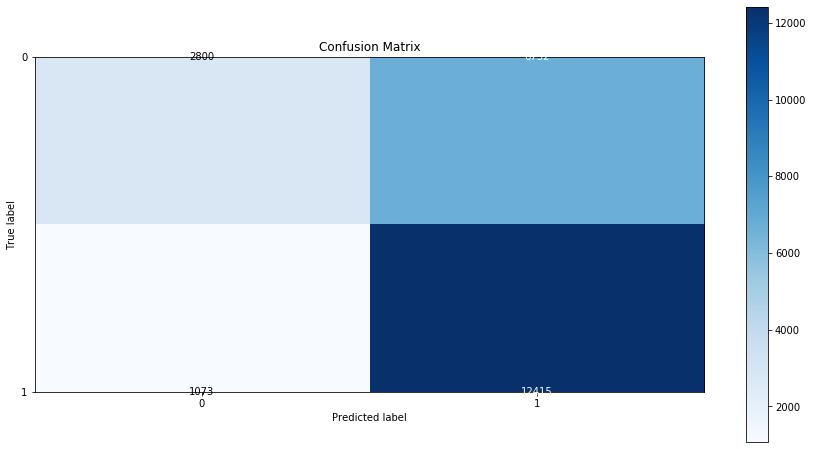

In [42]:
plt.rcParams['figure.figsize'] = [15,8]

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(ytest, log_pred)
plt.show()

----------

In [43]:
from sklearn.model_selection import cross_val_score, cross_val_predict
log_cross_val_score = cross_val_score(LR, Xtrain, ytrain, cv = 3)
log_cross_pred = cross_val_predict(LR, Xtest, ytest, cv = 3)

In [44]:
print(log_cross_val_score)

[0.6575152  0.65799305 0.65373588]


We can see, that a simpler logistic regression is giving the accuracy of `65%` till the end, hence we try something else. Let us work by `cross val prediction` so that we can have a good accuracy.

In [45]:
LR.score(Xtest, log_cross_pred)

0.932102519548219

Here we got 94% of accuracy, which seems quite better.

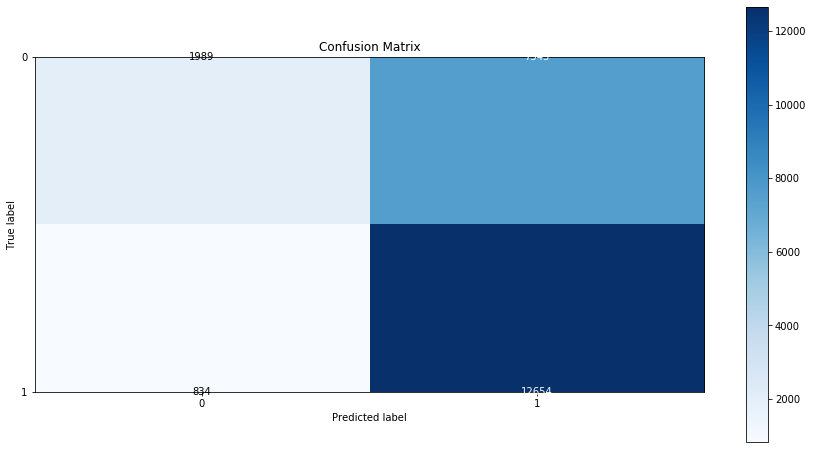

In [40]:
skplt.metrics.plot_confusion_matrix(ytest, log_cross_pred)
plt.show()

We see here some goodness in our work with k-fold technique.

### AUC_ROC Curve analysis:

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Simple LR model interpretations:')
print("Precision : ", precision_score(ytest, log_pred))
print("Recall : ", recall_score(ytest, log_pred))
print("F1 Score: ", f1_score(ytest, log_pred))
print()
print('Cross Validation model interpretations:')
print("Precision : ", precision_score(ytest, log_cross_pred))
print("Recall : ", recall_score(ytest, log_cross_pred))
print("F1 Score: ", f1_score(ytest, log_cross_pred))

Simple LR model interpretations:
Precision :  0.6484044497832558
Recall :  0.9204478054567022
F1 Score:  0.7608395893978857

Cross Validation model interpretations:
Precision :  0.6298091187815251
Recall :  0.9442467378410438
F1 Score:  0.7556214773064374


Model gave 64% scor for True postive rate from the class of the data, where 36% model misclassified. And 91% of the positive labels were predicted true out of actual positive labels, which seems better. Indeed we wish to have high precision and high recall, but our model is giving the accuracy around 94%. But circumstances do not allow to get both high, hence we go for harmonic value with respect to precision and recall. And here 75% score shows a quite good value for both precision and recall. 

##### Why harmonic means?
The reason is harmonic mean changes by precision and recall. Change in anyone of them can make f1-score changes. 

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
print('ROC_AUC Score:',roc_auc_score(ytest, log_pred))

ROC_AUC Score: 0.6070975913561312


### AUC-ROC curve

ROC_AUC_Score: 0.6059680534171217
ROC_AUC_Score: 0.5734164037077579


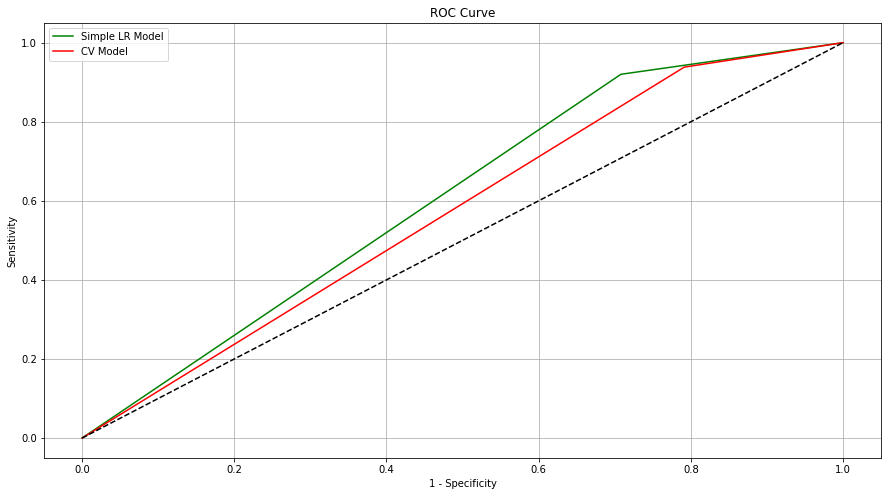

In [43]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)

print('ROC_AUC_Score:',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, c = 'g', label = 'Simple LR Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

More eventually we are not getting satisfied with this model. We should go for some thing probablistic model.

Set threshold:

In [60]:
clf = LogisticRegression(class_weight="balanced")
clf.fit(Xtrain, ytrain)
THRESHOLD = 0.25
preds_tr = np.where(clf.predict_proba(Xtrain)[:,1] > THRESHOLD, 1, 0)
preds_te = np.where(clf.predict_proba(Xtest)[:,1] > THRESHOLD, 1, 0)

In [61]:
print("Precision : ", precision_score(ytest, preds_te))
print("Recall : ", recall_score(ytest, preds_te))
print("F1 Score: ", f1_score(ytest, preds_te))

Precision :  0.5893280632411068
Recall :  0.9948843416370107
F1 Score:  0.7401952672513653


In [62]:
print('Accuracy for the train dataset:',clf.score(Xtrain, ytrain))
print('Accuracy for the test dataset:',clf.score(Xtest, ytest).round(3))

Accuracy for the train dataset: 0.6029105125977411
Accuracy for the test dataset: 0.598


-----------

## Naive Bayes 

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain, ytrain)
print('Accuracy for train data:',nb.score(Xtrain, ytrain))
print('Accuracy for test data:',nb.score(Xtest, ytest))

Accuracy for train data: 0.4305531421951926
Accuracy for test data: 0.42849695916594266


This seems very hard for Naive Bayes that we are not getting a good satisfied result from the morning.

In [45]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(nb, Xtrain, ytrain, cv = 3)
cvs

array([0.42932233, 0.42888792, 0.43027802])

In [46]:
print('Average Accuracy:',cvs.mean())

Average Accuracy: 0.42949609035621195


Let us see the classification report:

In [47]:
from sklearn.metrics import classification_report

print('Classification Report for Train set of data:')
print(classification_report(ytrain, nb.predict(Xtrain)))
print()
print('Classification Report for Test set of data:')
print(classification_report(ytest, nb.predict(Xtest)))

Classification Report for Train set of data:
              precision    recall  f1-score   support

           0       0.42      0.97      0.58     28597
           1       0.69      0.05      0.10     40463

    accuracy                           0.43     69060
   macro avg       0.55      0.51      0.34     69060
weighted avg       0.58      0.43      0.30     69060


Classification Report for Test set of data:
              precision    recall  f1-score   support

           0       0.42      0.97      0.58      9532
           1       0.67      0.05      0.09     13488

    accuracy                           0.43     23020
   macro avg       0.54      0.51      0.34     23020
weighted avg       0.57      0.43      0.29     23020



Still after k-fold technique we see the same performnace of the model. Let us go for other determinstic models.

-------

In [116]:
from sklearn.naive_bayes import GaussianNB
nbm = GaussianNB()
nbm.fit(x_train, Y_train)
print('Accuracy for train data:',nbm.score(x_train, Y_train))
print('Accuracy for test data:',nbm.score(x_test, Y_test)) 

Accuracy for train data: 0.4554735013032146
Accuracy for test data: 0.4584708948740226


Removing after multicollinearity did not make any improvement.

## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(Xtrain, ytrain)

In [49]:
print('Accuracy on train data:',dt.score(Xtrain, ytrain))
print('Accuracy on test data:',dt.score(Xtest, ytest))

Accuracy on train data: 1.0
Accuracy on test data: 0.8069939183318853


In [50]:
dt_pred = dt_model.predict(Xtest)

ROC_AUC_Score: 0.6059680534171217
ROC_AUC_Score: 0.5734164037077579
ROC_AUC_Score: 0.8019435780780131


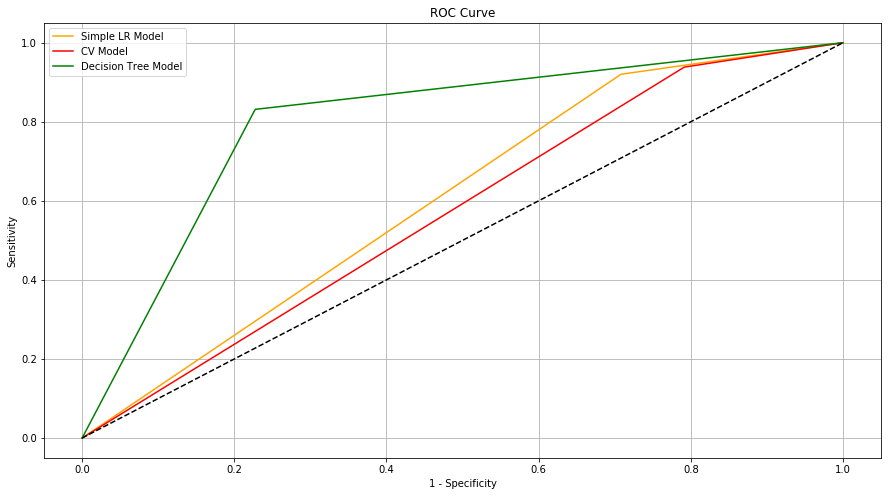

In [51]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)
fpr2, tpr2, th2 = roc_curve(ytest, dt_pred)

print('ROC_AUC_Score:',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, c = 'orange', label = 'Simple LR Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, dt_pred))
plt.plot(fpr2, tpr2, c = 'g', label = 'Decision Tree Model')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

We see that decision tree is giving the good accuracy. 

We know that `Overfitting` is a significant practical difficulty for decision tree models.

But for test set of data we got a good accuracy for it.

In [52]:
from sklearn.metrics import classification_report

print('Classification Report for Train set of data:')
print(classification_report(ytrain, dt.predict(Xtrain)))
print()
print('Classification Report for Test set of data:')
print(classification_report(ytest, dt.predict(Xtest)))

Classification Report for Train set of data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28597
           1       1.00      1.00      1.00     40463

    accuracy                           1.00     69060
   macro avg       1.00      1.00      1.00     69060
weighted avg       1.00      1.00      1.00     69060


Classification Report for Test set of data:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      9532
           1       0.84      0.83      0.83     13488

    accuracy                           0.81     23020
   macro avg       0.80      0.80      0.80     23020
weighted avg       0.81      0.81      0.81     23020



Since we get the good scores for all metrices, but the issue of natural `overfitting` comes again in the picture.

Let us tune the decision tree model

In [53]:
tune = {'criterion': ['entropy', 'gini'],
       'max_depth':range(2,10)}

from sklearn.model_selection import GridSearchCV
grid_selection = GridSearchCV(estimator = dt, param_grid = tune, cv = 3)
grid_dt_model = grid_selection.fit(Xtrain, ytrain)
print('Best parameters for the model are:', grid_dt_model.best_params_)

Best parameters for the model are: {'criterion': 'gini', 'max_depth': 9}


In [54]:
dt_grid = DecisionTreeClassifier(criterion = 'gini', max_depth = 9)
dt_grid.fit(Xtrain, ytrain)

print('Accuracy on train data:',dt_grid.score(Xtrain, ytrain))
print('Accuracy on test data:',dt_grid.score(Xtest, ytest))

Accuracy on train data: 0.8005212858384014
Accuracy on test data: 0.788966116420504


Let us take a look on classification report as well:

In [55]:
print('Classification reports for Train data:')
print(classification_report(ytrain, dt_grid.predict(Xtrain)))
print()
print('Classification report for Test data:')
print(classification_report(ytest, dt_grid.predict(Xtest)))

Classification reports for Train data:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72     28597
           1       0.77      0.93      0.85     40463

    accuracy                           0.80     69060
   macro avg       0.82      0.77      0.78     69060
weighted avg       0.81      0.80      0.79     69060


Classification report for Test data:
              precision    recall  f1-score   support

           0       0.84      0.61      0.70      9532
           1       0.77      0.92      0.84     13488

    accuracy                           0.79     23020
   macro avg       0.80      0.76      0.77     23020
weighted avg       0.80      0.79      0.78     23020



### Metrics Scores:

In [94]:
print("Precision : ", precision_score(ytest, dt_grid.predict(Xtest)))
print("Recall : ", recall_score(ytest, dt_grid.predict(Xtest)))
print("F1 Score: ", f1_score(ytest, dt_grid.predict(Xtest)))
print('ROC_AUC_Score:',roc_auc_score(ytest, dt_grid.predict(Xtest)))

Precision :  0.7674058473736373
Recall :  0.9185201660735468
F1 Score:  0.8361906047516199
ROC_AUC_Score: 0.7622919756091611


As we were facing overfitting in above situation, but here we do not see any heavy overfitting, even we see 79-80% of the f1-core all around seems better.

In [119]:
dt_gridm = DecisionTreeClassifier(criterion = 'gini', max_depth = 9)
dt_gridm.fit(x_train, Y_train)

print('Accuracy on train data:',dt_gridm.score(x_train, Y_train))
print('Accuracy on test data:',dt_gridm.score(x_test, Y_test))
print('\nMetrics Scores:')
print("Precision : ", precision_score(ytest, dt_gridm.predict(x_test)))
print("Recall : ", recall_score(Y_test, dt_gridm.predict(x_test)))
print("F1 Score: ", f1_score(Y_test, dt_gridm.predict(x_test)))
print('ROC_AUC_Score:',roc_auc_score(Y_test, dt_gridm.predict(x_test)))

Accuracy on train data: 0.7790761656530553
Accuracy on test data: 0.7656385751520417

Metrics Scores:
Precision :  0.5866095757103932
Recall :  0.8735923633380566
F1 Score:  0.8128230926690491
ROC_AUC_Score: 0.7443084072438904


Multicollinearity affects the accuracy.

What does the tree tells about?

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.602169 to fit



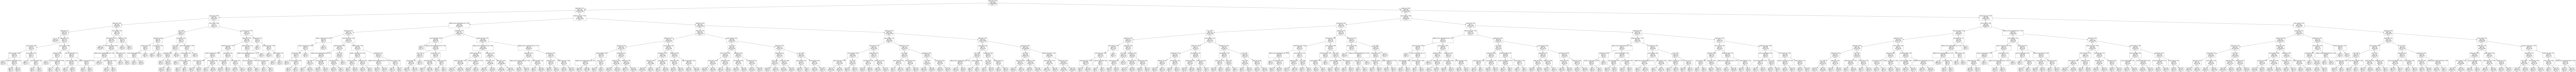

In [56]:
import pydotplus
from IPython.display import Image  
from sklearn import tree

labels = Xtrain.columns

dot_data = tree.export_graphviz(dt_grid, feature_names = labels, class_names = ["0","1"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

We see this observation, so that we are not going to deal with clear plot for tree glance.

Let us do something with a method **KNN**.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [58]:
print('Accuracy on train data:',knn.score(Xtrain, ytrain))
print('Accuracy on test data:',knn.score(Xtest, ytest))

Accuracy on train data: 0.7399797277729511
Accuracy on test data: 0.5975238922675934


We see a little overfitting in the model.

It possible to do tuning for the KNN model, but since the data is quite larger, it will definiely take a lot of time to get excuted. Hence we believe to get ahead with some other models.

Let us head to the `Ensemble` technique to get the best predictions:

## Stacking

In [59]:
from sklearn.ensemble import VotingClassifier
LR1 = LogisticRegression(solver = 'saga', max_iter = 200)
nb1 = GaussianNB()
dt1 = DecisionTreeClassifier(criterion = grid_dt_model.best_params_.get('criterion'),
                                  max_depth = grid_dt_model.best_params_.get('max_depth'))

In [60]:
st_vot = VotingClassifier([('Logistic Regression',LR1), 
                           ('Naive Bayes',nb1), 
                           ('Decision Tree',dt1)])

In [61]:
print('Accuracy with Train data for the model:',st_vot.fit(Xtrain, ytrain).score(Xtrain, ytrain))
print()
print('Accuracy with Train data for the model:',st_vot.fit(Xtrain, ytrain).score(Xtest, ytest))

Accuracy with Train data for the model: 0.7874022589052997

Accuracy with Train data for the model: 0.7753258036490008


In [62]:
vot_pred = st_vot.fit(Xtrain, ytrain).predict(Xtest)

ROC_AUC_Score: 0.6059680534171217
ROC_AUC_Score: 0.5734164037077579
ROC_AUC_Score: 0.8019435780780131
ROC_AUC_Score: 0.7574171088308895


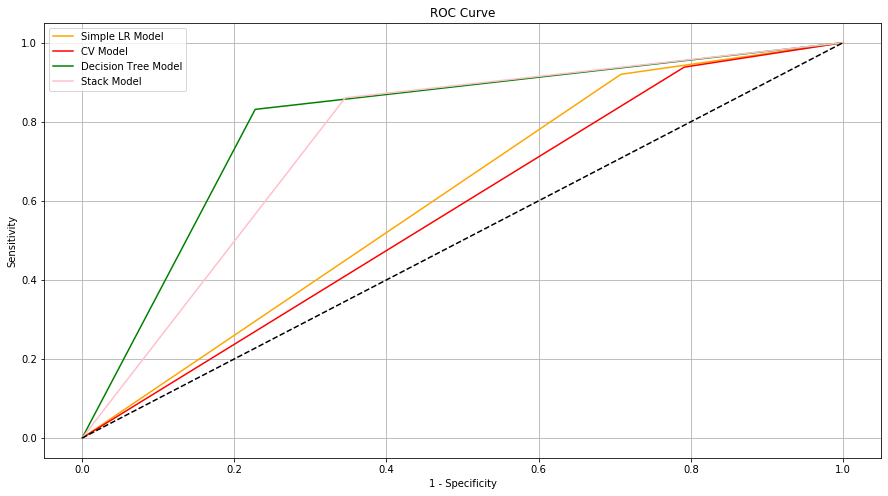

In [63]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)
fpr2, tpr2, th2 = roc_curve(ytest, dt_pred)
fpr3, tpr3, th3 = roc_curve(ytest, vot_pred)

print('ROC_AUC_Score:',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, c = 'orange', label = 'Simple LR Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, dt_pred))
plt.plot(fpr2, tpr2, c = 'g', label = 'Decision Tree Model')

print('ROC_AUC_Score:',roc_auc_score(ytest, vot_pred))
plt.plot(fpr3, tpr3, c = 'pink', label = 'Stack Model')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

In [64]:
print('Classification reports for Train data:')
print(classification_report(ytrain, st_vot.fit(Xtrain, ytrain).predict(Xtrain)))
print()
print('Classification report for Test data:')
print(classification_report(ytest, vot_pred))

Classification reports for Train data:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72     28597
           1       0.79      0.87      0.83     40463

    accuracy                           0.79     69060
   macro avg       0.79      0.77      0.77     69060
weighted avg       0.79      0.79      0.78     69060


Classification report for Test data:
              precision    recall  f1-score   support

           0       0.77      0.65      0.71      9532
           1       0.78      0.86      0.82     13488

    accuracy                           0.78     23020
   macro avg       0.77      0.76      0.76     23020
weighted avg       0.77      0.78      0.77     23020



### Metric Scores:

In [95]:
print("Precision : ", precision_score(ytest, st_vot.fit(Xtrain, ytrain).predict(Xtest)))
print("Recall : ", recall_score(ytest, st_vot.fit(Xtrain, ytrain).predict(Xtest)))
print("F1 Score: ", f1_score(ytest, st_vot.fit(Xtrain, ytrain).predict(Xtest)))
print('ROC_AUC_Score:',roc_auc_score(ytest, st_vot.fit(Xtrain, ytrain).predict(Xtest)))

Precision :  0.7793742446622801
Recall :  0.8607651245551602
F1 Score:  0.817973729619326
ROC_AUC_Score: 0.7578031936129235


Multicollinearity

In [120]:
st_votm = VotingClassifier([('Logistic Regression',LR1), 
                           ('Naive Bayes',nb1), 
                           ('Decision Tree',dt1)])

st_votm.fit(x_train, Y_train)

print('Accuracy on train data:',st_votm.score(x_train, Y_train))
print('Accuracy on test data:',st_votm.score(x_test, Y_test))
print('\nMetrics Scores:')
print("Precision : ", precision_score(ytest, st_votm.predict(x_test)))
print("Recall : ", recall_score(Y_test, st_votm.predict(x_test)))
print("F1 Score: ", f1_score(Y_test, st_votm.predict(x_test)))
print('ROC_AUC_Score:',roc_auc_score(Y_test, st_votm.predict(x_test)))

Accuracy on train data: 0.7536779611931653
Accuracy on test data: 0.7460903562119896

Metrics Scores:
Precision :  0.5870976116303219
Recall :  0.8565888582295473
F1 Score:  0.7971683381337406
ROC_AUC_Score: 0.7242573882241277


It reduces the accuracy after after dealing with multicollinear features.

From the plot and classification report we can mention that, at least this model is quite better than that of `Logistic Regression` and `Naive Bayes`. Even precision and recall gives the idea of good insights.

Time consuming...
## Bagging: BootStrap Aggregation

In [65]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator = dt1)
bagg.fit(Xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9))

In [66]:
print('Accuracy for the train data:',bagg.score(Xtrain, ytrain))
print('Accuracy for the test data:',bagg.score(Xtest, ytest))

Accuracy for the train data: 0.8292788879235448
Accuracy for the test data: 0.8119895742832319


Let us take some inferences from the classification report:

In [67]:
print('Classification reports for Train data:')
print(classification_report(ytrain, bagg.fit(Xtrain, ytrain).predict(Xtrain)))
print()
print('Classification report for Test data:')
print(classification_report(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest)))

Classification reports for Train data:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     28597
           1       0.81      0.92      0.86     40463

    accuracy                           0.83     69060
   macro avg       0.84      0.81      0.82     69060
weighted avg       0.83      0.83      0.82     69060


Classification report for Test data:
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      9532
           1       0.80      0.91      0.85     13488

    accuracy                           0.81     23020
   macro avg       0.82      0.79      0.80     23020
weighted avg       0.82      0.81      0.81     23020



### Metric Scores:

In [96]:
print("Precision : ", precision_score(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest)))
print("Recall : ", recall_score(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest)))
print("F1 Score: ", f1_score(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest)))
print('ROC_AUC_Score:',roc_auc_score(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest)))

Precision :  0.7989551083591331
Recall :  0.9202995255041518
F1 Score:  0.8498105995973108
ROC_AUC_Score: 0.7938103324557251


Same situation we face here about the inference of the data.

In [121]:
baggm = BaggingClassifier(base_estimator = dt1)

baggm.fit(x_train, Y_train)

print('Accuracy on train data:',baggm.score(x_train, Y_train))
print('Accuracy on test data:',baggm.score(x_test, Y_test))
print('\nMetrics Scores:')
print("Precision : ", precision_score(ytest, baggm.predict(x_test)))
print("Recall : ", recall_score(Y_test, baggm.predict(x_test)))
print("F1 Score: ", f1_score(Y_test, baggm.predict(x_test)))
print('ROC_AUC_Score:',roc_auc_score(Y_test, baggm.predict(x_test)))

Accuracy on train data: 0.8041268462206776
Accuracy on test data: 0.786750651607298

Metrics Scores:
Precision :  0.584713130535233
Recall :  0.8979789693489447
F1 Score:  0.8306715877341243
ROC_AUC_Score: 0.7647734821773338


It reduces the accuracy after after dealing with multicollinear features.

## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)

RandomForestClassifier()

In [65]:
print('Accuracy for the train data:',rf.score(Xtrain, ytrain))
print('Accuracy for the test data:',rf.score(Xtest, ytest))

Accuracy for the train data: 1.0
Accuracy for the test data: 0.8288879235447437


We faced the same issue like decision tree a huge `Overfitting`, let us see whether tuning the model could make any changes.

In [66]:
tune1 = {'criterion': ['entropy', 'gini'],
       'max_depth':range(2,10)}

from sklearn.model_selection import GridSearchCV
grid_selections = GridSearchCV(estimator = rf, param_grid = tune1, cv = 3)
grid_rf_model = grid_selections.fit(Xtrain, ytrain)
print('Best parameters for the model are:', grid_rf_model.best_params_)

Best parameters for the model are: {'criterion': 'gini', 'max_depth': 9}


In [67]:
grid_rf = RandomForestClassifier(criterion = grid_rf_model.best_params_.get('criterion'),
                                 max_depth = grid_rf_model.best_params_.get('max_depth'))
grid_rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=9)

In [68]:
print('Accuracy for the train data:',grid_rf.score(Xtrain, ytrain))
print('Accuracy for the test data:',grid_rf.score(Xtest, ytest))

Accuracy for the train data: 0.7742832319721981
Accuracy for the test data: 0.7594700260642919


### Metrics scores:

In [97]:
print("Precision : ", precision_score(ytest, grid_rf.fit(Xtrain, ytrain).predict(Xtest)))
print("Recall : ", recall_score(ytest, grid_rf.fit(Xtrain, ytrain).predict(Xtest)))
print("F1 Score: ", f1_score(ytest, grid_rf.fit(Xtrain, ytrain).predict(Xtest)))
print('ROC_AUC_Score:',roc_auc_score(ytest, grid_rf.fit(Xtrain, ytrain).predict(Xtest)))

Precision :  0.7346112632456244
Recall :  0.9175563463819691
F1 Score:  0.8150281363786824
ROC_AUC_Score: 0.7280667784957605


Just like `stack model` we see here the change is very minor, which means we should proceed with base model.  It was `overfitting` without tuning.

In [69]:
grid_rfm = RandomForestClassifier(criterion = grid_rf_model.best_params_.get('criterion'),
                                 max_depth = grid_rf_model.best_params_.get('max_depth'))

grid_rfm.fit(x_train, Y_train)

print('Accuracy on train data:',grid_rfm.score(x_train, Y_train))
print('Accuracy on test data:',grid_rfm.score(x_test, Y_test))
print('\nMetrics Scores:')
print("Precision : ", precision_score(ytest, grid_rfm.predict(x_test)))
print("Recall : ", recall_score(Y_test, grid_rfm.predict(x_test)))
print("F1 Score: ", f1_score(Y_test, grid_rfm.predict(x_test)))
print('ROC_AUC_Score:',roc_auc_score(Y_test, grid_rfm.predict(x_test)))

Accuracy on train data: 0.7372140167969882
Accuracy on test data: 0.7163770634231104

Metrics Scores:
Precision :  0.5803172737955347
Recall :  0.8913092129802312
F1 Score:  0.7854067378800329
ROC_AUC_Score: 0.6819000563081083


No improvement after dealing with multicollinear features.

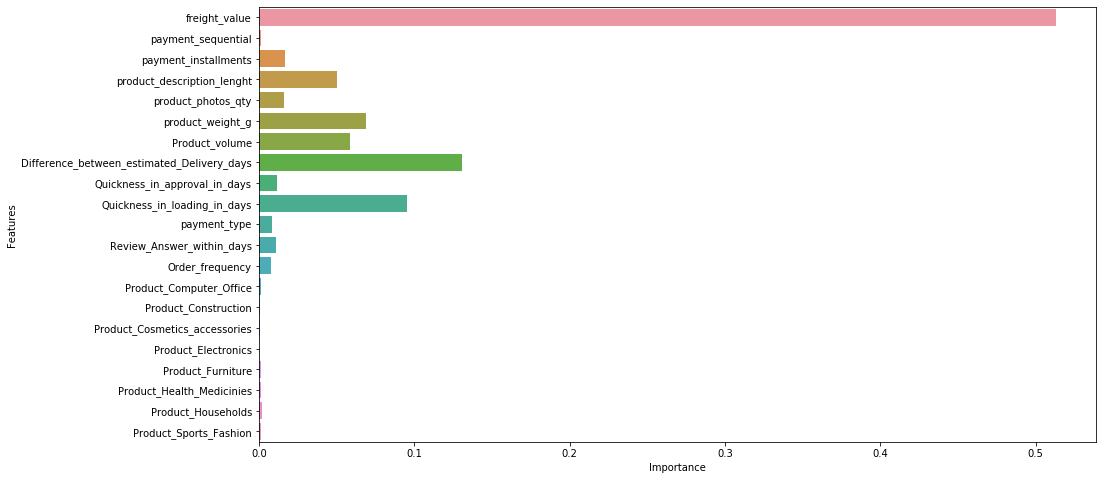

In [71]:
impor = pd.DataFrame({'Features': x_train.columns,
                     'Importance': grid_rfm.feature_importances_})

imp_f = impor.sort_values('Importance', ascending = False)

import seaborn as sns
sns.barplot(x = 'Importance', y = 'Features', data = impor)
plt.show()

These are the features are contributing a well in random Forest Classifier.

In [80]:
xbar = x_train[['freight_value', 'payment_installments',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'Product_volume', 'Difference_between_estimated_Delivery_days',
       'Quickness_in_approval_in_days', 'Quickness_in_loading_in_days',
       'payment_type', 'Review_Answer_within_days', 'Order_frequency']]
xb = x_test[['freight_value', 'payment_installments',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'Product_volume', 'Difference_between_estimated_Delivery_days',
       'Quickness_in_approval_in_days', 'Quickness_in_loading_in_days',
       'payment_type', 'Review_Answer_within_days', 'Order_frequency']]

rff = RandomForestClassifier(criterion =  'gini', max_depth = 9)

rff.fit(xbar, Y_train)

print('Accuracy on train data:',rff.score(xbar, Y_train))
print('Accuracy on test data:',rff.score(xb, Y_test))
print('\nMetrics Scores:')
print("Precision : ", precision_score(ytest, rff.predict(xb)))
print("Recall : ", recall_score(Y_test, rff.predict(xb)))
print("F1 Score: ", f1_score(Y_test, rff.predict(xb)))
print('ROC_AUC_Score:',roc_auc_score(Y_test, rff.predict(xb)))

Accuracy on train data: 0.7517810599478714
Accuracy on test data: 0.7303649000868809

Metrics Scores:
Precision :  0.5827278141751042
Recall :  0.8947407683700112
F1 Score:  0.7944361649279682
ROC_AUC_Score: 0.6979684081059625


**Same after Best features estimated.**

Just F1 score imporoved by 1%.

----------

## Boosting
### Adaptive Boosting

In [73]:
from sklearn.ensemble import AdaBoostClassifier
ad_boost = AdaBoostClassifier(base_estimator = dt1)
ad_boost.fit(Xtrain, ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9))

In [74]:
print('Accuracy for the train data:',ad_boost.score(Xtrain, ytrain))
print('Accuracy for the test data:',ad_boost.score(Xtest, ytest))

Accuracy for the train data: 0.9988850275123081
Accuracy for the test data: 0.814596003475239


We got here one of the best model to accuracy. But even `Overfitting` is an issue. 

In [75]:
ada_pred = ad_boost.fit(Xtest, ytest).predict(Xtest)

LR model            : 0.6059680534171217
LR CV model         : 0.5734164037077579
Decision Tree model : 0.8019435780780131
Stack model         : 0.7574171088308895
Adaboost model      : 1.0


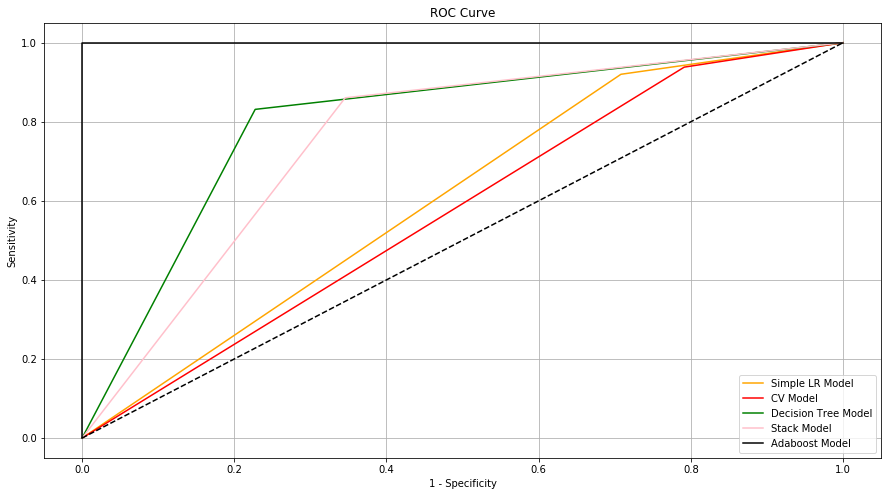

In [76]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)
fpr2, tpr2, th2 = roc_curve(ytest, dt_pred)
fpr3, tpr3, th3 = roc_curve(ytest, vot_pred)
fpr4, tpr4, th4 = roc_curve(ytest, ada_pred)

print('LR model            :',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, c = 'orange', label = 'Simple LR Model')

print('LR CV model         :',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

print('Decision Tree model :',roc_auc_score(ytest, dt_pred))
plt.plot(fpr2, tpr2, c = 'g', label = 'Decision Tree Model')

print('Stack model         :',roc_auc_score(ytest, vot_pred))
plt.plot(fpr3, tpr3, c = 'pink', label = 'Stack Model')

print('Adaboost model      :',roc_auc_score(ytest, ada_pred))
plt.plot(fpr4, tpr4, c = 'black', label = 'Adaboost Model')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

In [77]:
print('Classification reports for Train data:')
print(classification_report(ytrain, ad_boost.fit(Xtrain, ytrain).predict(Xtrain)))
print()
print('Classification report for Test data:')
print(classification_report(ytest, ad_boost.fit(Xtrain, ytrain).predict(Xtest)))

Classification reports for Train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28597
           1       1.00      1.00      1.00     40463

    accuracy                           1.00     69060
   macro avg       1.00      1.00      1.00     69060
weighted avg       1.00      1.00      1.00     69060


Classification report for Test data:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      9532
           1       0.84      0.86      0.85     13488

    accuracy                           0.82     23020
   macro avg       0.81      0.81      0.81     23020
weighted avg       0.82      0.82      0.82     23020



Plot shows again one of the option to go with. And the classificatio report again shows the scores of precision and recall and f1-score. But the result of classification report is astonishing.

In [124]:
print("Precision : ", precision_score(ytest, ad_boost.fit(Xtrain, ytrain).predict(Xtest)))
print("Recall : ", recall_score(ytest, ad_boost.fit(Xtrain, ytrain).predict(Xtest)))
print("F1 Score: ", f1_score(ytest, ad_boost.fit(Xtrain, ytrain).predict(Xtest)))
print('ROC_AUC_Score:',roc_auc_score(ytest, ad_boost.fit(Xtrain, ytrain).predict(Xtest)))

Precision :  0.8390787949015064
Recall :  0.8595788849347569
F1 Score:  0.8470138275963519
ROC_AUC_Score: 0.8168946525383188


In [123]:
ad_boostm = AdaBoostClassifier(base_estimator = dt1)

ad_boostm.fit(x_train, Y_train)

print('Accuracy on train data:',ad_boostm.score(x_train, Y_train))
print('Accuracy on test data:',ad_boostm.score(x_test, Y_test))
print('\nMetrics Scores:')
print("Precision : ", precision_score(ytest, ad_boostm.predict(x_test)))
print("Recall : ", recall_score(Y_test, ad_boostm.predict(x_test)))
print("F1 Score: ", f1_score(Y_test, ad_boostm.predict(x_test)))
print('ROC_AUC_Score:',roc_auc_score(Y_test, ad_boostm.predict(x_test)))

Accuracy on train data: 0.9701419055893425
Accuracy on test data: 0.7806689834926152

Metrics Scores:
Precision :  0.5873200523484078
Recall :  0.824595420985905
F1 Score:  0.8141221514560247
ROC_AUC_Score: 0.7719897300538723


No improvement after dealing with multicollinear features.

### Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gr_boost = GradientBoostingClassifier()
gr_boost.fit(Xtrain, ytrain)

GradientBoostingClassifier()

In [79]:
print('Accuracy for the train data:',gr_boost.score(Xtrain, ytrain))
print('Accuracy for the test data:',gr_boost.score(Xtest, ytest))

Accuracy for the train data: 0.7893860411236606
Accuracy for the test data: 0.786750651607298


### Metrics Scores:

In [98]:
print("Precision : ", precision_score(ytest, gr_boost.fit(Xtrain, ytrain).predict(Xtest)))
print("Recall : ", recall_score(ytest, gr_boost.fit(Xtrain, ytrain).predict(Xtest)))
print("F1 Score: ", f1_score(ytest, gr_boost.fit(Xtrain, ytrain).predict(Xtest)))
print('ROC_AUC_Score:',roc_auc_score(ytest, gr_boost.fit(Xtrain, ytrain).predict(Xtest)))

Precision :  0.775692525226557
Recall :  0.8947953736654805
F1 Score:  0.8309980376630978
ROC_AUC_Score: 0.7643301249359715


In [125]:
gr_boostm = GradientBoostingClassifier()

gr_boostm.fit(x_train, Y_train)

print('Accuracy on train data:',gr_boostm.score(x_train, Y_train))
print('Accuracy on test data:',gr_boostm.score(x_test, Y_test))
print('\nMetrics Scores:')
print("Precision : ", precision_score(ytest, gr_boostm.predict(x_test)))
print("Recall : ", recall_score(Y_test, gr_boostm.predict(x_test)))
print("F1 Score: ", f1_score(Y_test, gr_boostm.predict(x_test)))
print('ROC_AUC_Score:',roc_auc_score(Y_test, gr_boostm.predict(x_test)))

Accuracy on train data: 0.7635244714740805
Accuracy on test data: 0.7630321459600348

Metrics Scores:
Precision :  0.5847478938765246
Recall :  0.8897009471250652
F1 Score:  0.8139177895275457
ROC_AUC_Score: 0.7380041516397359


With this model, again the same situation like previous model. As similar as `stack model`.

Tuning the model:

In [80]:
#tune2 = { 'loss' : ['deviance', 'exponential'],
#         'criterion': ['friedman_mse', 'mse', 'mae'],
 #      'learning_rate' : [0.1, 0.2, 0.3, 0.5, 0.001, 0.002, 0.003],
  #  'n_estimators': range(100,500,100),
   # 'subsample': [1.0, 2.0, 3.0]}

#from sklearn.model_selection import GridSearchCV
#grid_selections1 = GridSearchCV(estimator = gr_boost, param_grid = tune2, cv = 3)
#grid_gr_model = grid_selections1.fit(Xtrain, ytrain)
#print('Best parameters for the model are:', grid_gr_model.best_params_)

In [81]:
#grid_gr = GradientBoostingClassifier(criterion = grid_gr_model.best_params_.get('criterion'),
#                                 loss = grid_gr_model.best_params_.get('loss'),
 #                                   learning_rate = grid_gr_model.best_params_.get('learning_rate'),
  #                                  n_estimators = grid_gr_model.best_params_.get('n_estimators'),
   #                                 subsample = grid_gr_model.best_params_.get('subsample'))
#grid_gr.fit(Xtrain, ytrain)

In [82]:
#print('Accuracy for the train data:',grid_gr.score(Xtrain, ytrain))
#print('Accuracy for the test data:',grid_gr.score(Xtest, ytest))

### Extra Trees Classifier

In [83]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators = 20)
etc.fit(Xtrain, ytrain)

ExtraTreesClassifier(n_estimators=20)

In [84]:
print('Accuracy for the train data:',etc.score(Xtrain, ytrain))
print('Accuracy for the test data:',etc.score(Xtest, ytest))

Accuracy for the train data: 1.0
Accuracy for the test data: 0.7234578627280626


In [126]:
etcm = ExtraTreesClassifier(n_estimators = 20)

etcm.fit(x_train, Y_train)

print('Accuracy on train data:',etcm.score(x_train, Y_train))
print('Accuracy on test data:',etcm.score(x_test, Y_test))
print('\nMetrics Scores:')
print("Precision : ", precision_score(ytest, etcm.predict(x_test)))
print("Recall : ", recall_score(Y_test, etcm.predict(x_test)))
print("F1 Score: ", f1_score(Y_test, etcm.predict(x_test)))
print('ROC_AUC_Score:',roc_auc_score(Y_test, etcm.predict(x_test)))

Accuracy on train data: 1.0
Accuracy on test data: 0.7068201563857516

Metrics Scores:
Precision :  0.5841336399296632
Recall :  0.7996867775374749
F1 Score:  0.7606313176095053
ROC_AUC_Score: 0.688471002960809


Again the issue of `overfitting`.

Let us tune this model as well:

In [85]:
tune2 = {'criterion': ['entropy', 'gini'],
       'max_depth':range(2,10)}

from sklearn.model_selection import GridSearchCV
grid_selections_ = GridSearchCV(estimator = etc, param_grid = tune2, cv = 3)
grid_etc_model = grid_selections_.fit(Xtrain, ytrain)
print('Best parameters for the model are:', grid_etc_model.best_params_)

Best parameters for the model are: {'criterion': 'entropy', 'max_depth': 9}


In [86]:
grid_etc = ExtraTreesClassifier(bootstrap=True, n_estimators = 20, 
                                criterion = grid_etc_model.best_params_.get('criterion'),
                                  max_depth = grid_etc_model.best_params_.get('max_depth'))
grid_etc.fit(Xtrain, ytrain)

ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=9,
                     n_estimators=20)

In [87]:
print('Accuracy for the train data:',grid_etc.score(Xtrain, ytrain))
print('Accuracy for the test data:',grid_etc.score(Xtest, ytest))

Accuracy for the train data: 0.6166811468288445
Accuracy for the test data: 0.6131624674196351


Extra tree was uniquely fine, but after tuning model is falling down like `Logistic Regression`.

In [127]:
grid_etcm = ExtraTreesClassifier(bootstrap=True, n_estimators = 20, 
                                criterion = grid_etc_model.best_params_.get('criterion'),
                                  max_depth = grid_etc_model.best_params_.get('max_depth'))

grid_etcm.fit(x_train, Y_train)

print('Accuracy on train data:',grid_etcm.score(x_train, Y_train))
print('Accuracy on test data:',grid_etcm.score(x_test, Y_test))
print('\nMetrics Scores:')
print("Precision : ", precision_score(ytest, grid_etcm.predict(x_test)))
print("Recall : ", recall_score(Y_test, grid_etcm.predict(x_test)))
print("F1 Score: ", f1_score(Y_test, grid_etcm.predict(x_test)))
print('ROC_AUC_Score:',roc_auc_score(Y_test, grid_etcm.predict(x_test)))

Accuracy on train data: 0.5948016217781639
Accuracy on test data: 0.5873153779322329

Metrics Scores:
Precision :  0.5862658311056576
Recall :  0.9966440450443732
F1 Score:  0.7377718891465165
ROC_AUC_Score: 0.506437723281733


No effect of multicollinearity assumption.

LR model                     : 0.6059680534171217
LR CV model                  : 0.5734164037077579
Decision Tree model          : 0.8019435780780131
Decision Tree model Tuned    : 0.7622919756091611
Stack model                  : 0.7574171088308895
Bagging                      : 0.7890068989067978
Random Foret                 : 0.8091034215023478
Random Foret Tuned           : 0.7298720698064434
Adaboost model               : 1.0
Gradient model               : 0.7643301249359715
Extra Trees Classifier       : 0.7033366007191111
Extra Trees Classifier Tuned : 0.5231709982084446


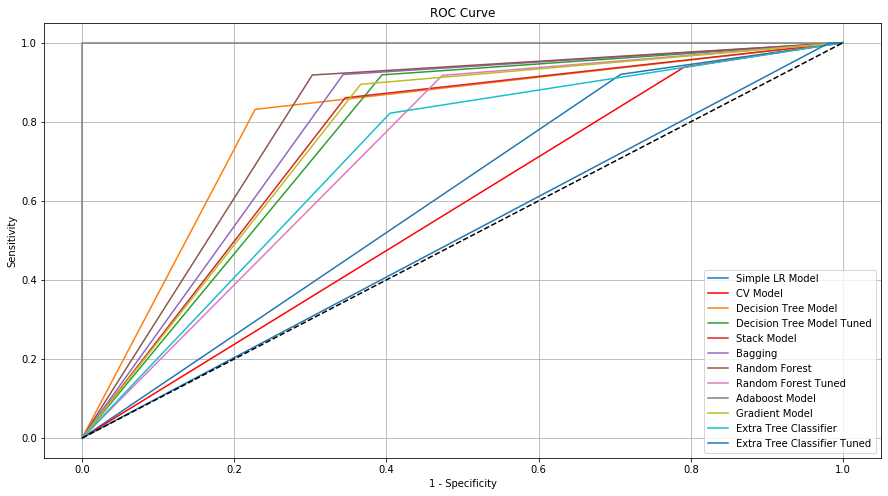

In [88]:
fpr, tpr, th = roc_curve(ytest, log_pred)
fpr1, tpr1, th1 = roc_curve(ytest, log_cross_pred)
fpr2, tpr2, th2 = roc_curve(ytest, dt_pred)
fpr22, tpr22, th22 = roc_curve(ytest, dt_grid.fit(Xtrain, ytrain).predict(Xtest))
fpr3, tpr3, th3 = roc_curve(ytest, vot_pred)
fpra, tpra, tha = roc_curve(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest))
fprb, tprb, thb = roc_curve(ytest, rf.fit(Xtrain, ytrain).predict(Xtest))
fprb1, tprb1, thb1 = roc_curve(ytest, grid_rf.fit(Xtrain, ytrain).predict(Xtest))
fpr4, tpr4, th4 = roc_curve(ytest, ada_pred)
fpr5, tpr5, th5 = roc_curve(ytest, gr_boost.fit(Xtrain, ytrain).predict(Xtest))
fpr6, tpr6, th6 = roc_curve(ytest, etc.fit(Xtrain, ytrain).predict(Xtest))
fpr7, tpr7, th7 = roc_curve(ytest, grid_etc.fit(Xtrain, ytrain).predict(Xtest))

print('LR model                     :',roc_auc_score(ytest, log_pred))
plt.plot(fpr, tpr, label = 'Simple LR Model')

print('LR CV model                  :',roc_auc_score(ytest, log_cross_pred))
plt.plot(fpr1, tpr1, 'r', label = 'CV Model')

print('Decision Tree model          :',roc_auc_score(ytest, dt_pred))
plt.plot(fpr2, tpr2, label = 'Decision Tree Model')

print('Decision Tree model Tuned    :',roc_auc_score(ytest, dt_grid.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpr22, tpr22, label = 'Decision Tree Model Tuned')

print('Stack model                  :',roc_auc_score(ytest, vot_pred))
plt.plot(fpr3, tpr3, label = 'Stack Model')

print('Bagging                      :',roc_auc_score(ytest, bagg.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpra, tpra, label = 'Bagging')

print('Random Foret                 :',roc_auc_score(ytest, rf.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fprb, tprb, label = 'Random Forest')

print('Random Foret Tuned           :',roc_auc_score(ytest, grid_rf.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fprb1, tprb1, label = 'Random Forest Tuned')

print('Adaboost model               :',roc_auc_score(ytest, ada_pred))
plt.plot(fpr4, tpr4, label = 'Adaboost Model')

print('Gradient model               :',roc_auc_score(ytest, gr_boost.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpr5, tpr5, label = 'Gradient Model')

print('Extra Trees Classifier       :',roc_auc_score(ytest, etc.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpr6, tpr6, label = 'Extra Tree Classifier')

print('Extra Trees Classifier Tuned :',roc_auc_score(ytest, grid_etc.fit(Xtrain, ytrain).predict(Xtest)))
plt.plot(fpr7, tpr7, label = 'Extra Tree Classifier Tuned')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

LR model                     : 0.6014208677552341
LR CV model                  : 0.5749177927357321
Decision Tree model          : 0.8081465496822055
Decision Tree model Tuned    : 0.771201753933306
Stack model                  : 0.7641534351665751
Bagging                      : 0.7896083901177469
Random Foret                 : 0.8078773519189124
Random Foret Tuned           : 0.7176639153719
Adaboost model               : 1.0
Gradient model               : 0.759712519682044
Extra Trees Classifier       : 0.6992541336996998
Extra Trees Classifier Tuned : 0.5100418277552988

In [100]:
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Decision Tree Tuned' , 'KNN', 'Stacking', 'Bagging',
          'Random Forest', 'Random Forest Tuned', 'Adaptive Boosting', 'Gradient Boosting',
          'Extra Trees', 'Extra Trees Tuned']
train = [0.6546626122212569, 0.4312771503040834, 1.0, 0.8064871126556618, 0.7399942079351288, 0.7886765131769475,
        0.8223718505647263, 1.0, 0.7715899218071243, 0.999290472053287, 0.7875036200405444, 1.0,
        0.6166811468288445]
test = [0.656, 0.4318665566222145, 0.8087832848268972, 0.7914512836106163, 0.5951522522913861, 0.7778115633551974,
       0.8050910038660354, 0.8294600582077234, 0.7562660179835802, 0.8223361278832371, 0.7823726163068503, 
        0.7195169627731202, 0.6131624674196351]

pd.DataFrame({'Model': models, 'Train accuracy': train, 'Test accuracy': test}, index = [i for i in range(1,14)])

,Model,Train accuracy,Test accuracy
1,Logistic Regression,0.654663,0.656000
2,Naive Bayes,0.431277,0.431867
3,Decision Tree,1.000000,0.808783
4,Decision Tree Tuned,0.806487,0.791451
5,KNN,0.739994,0.595152
6,Stacking,0.788677,0.777812
7,Bagging,0.822372,0.805091
8,Random Forest,1.000000,0.829460
9,Random Forest Tuned,0.771590,0.756266
10,Adaptive Boosting,0.999290,0.822336
